# **Covid-19 Data Analysis, Part-1**

**1. Load and Pre-process the Dataset**

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:

url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
data = pd.read_csv(url)

In [76]:
print(data.isnull().sum())

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [77]:
data['Date'] = pd.to_datetime(data['Date'])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


**2. Data Exploration and** **Cleaning**

In [78]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("\nData types:")
print(data.dtypes)

Number of rows: 161568
Number of columns: 5

Data types:
Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object


In [79]:
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [80]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


In [81]:
print(data.describe())

                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  
count  161568.000000  
mean    13999.436089  
min         0.000000  
25%        17.000000  
50%       365.000000  
75%      4509.000000  
max    988609.000000  
std     59113.581271  


Outliers in Confirmed: (array([ 20001,  20002,  20003, ..., 153405, 153406, 153407]),)
Outliers in Deaths: (array([ 19925,  19926,  19927, ..., 150141, 150142, 150143]),)
Outliers in Recovered: (array([  6198,   6199,   6200, ..., 149652, 149653, 149654]),)


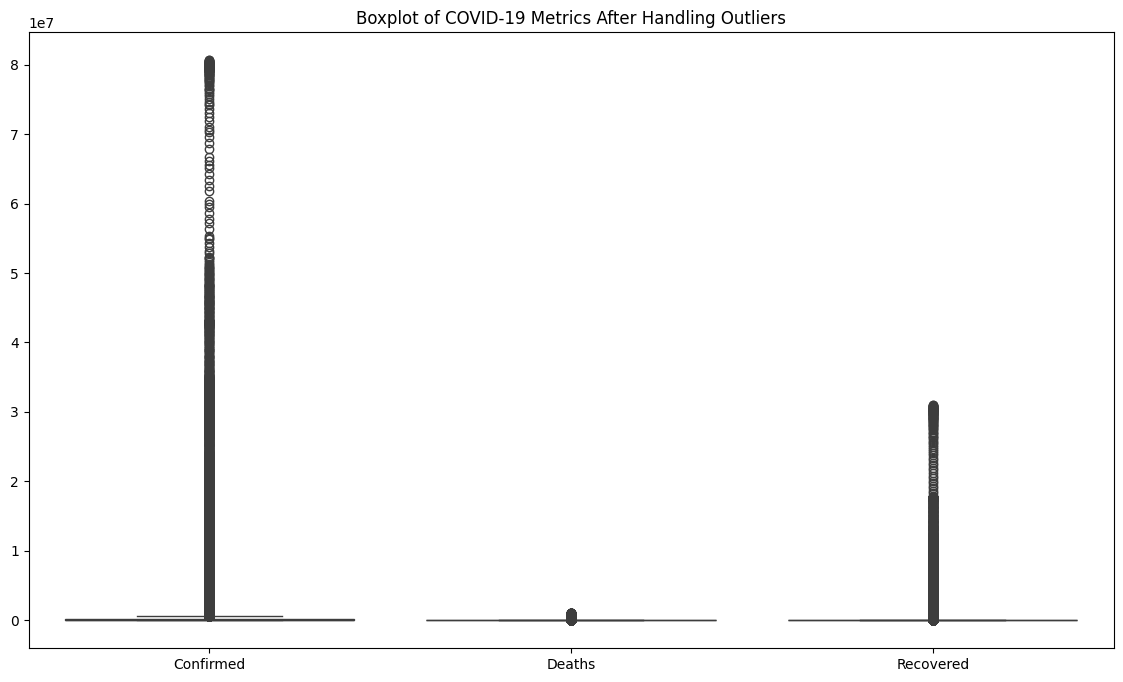

In [82]:
def identify_outliers(df, column):
    threshold = 3
    mean = np.mean(df[column])
    std = np.std(df[column])
    z_scores = [(y - mean) / std for y in df[column]]
    return np.where(np.abs(z_scores) > threshold)

outliers_confirmed = identify_outliers(data, 'Confirmed')
outliers_deaths = identify_outliers(data, 'Deaths')
outliers_recovered = identify_outliers(data, 'Recovered')

print(f"Outliers in Confirmed: {outliers_confirmed}")
print(f"Outliers in Deaths: {outliers_deaths}")
print(f"Outliers in Recovered: {outliers_recovered}")

data['Confirmed'] = data['Confirmed'].apply(lambda x: np.nan if x < 0 else x)
data['Deaths'] = data['Deaths'].apply(lambda x: np.nan if x < 0 else x)
data['Recovered'] = data['Recovered'].apply(lambda x: np.nan if x < 0 else x)

data['Confirmed'] = data['Confirmed'].interpolate()
data['Deaths'] = data['Deaths'].interpolate()
data['Recovered'] = data['Recovered'].interpolate()

plt.figure(figsize=(14, 8))
sns.boxplot(data=data[['Confirmed', 'Deaths', 'Recovered']])
plt.title('Boxplot of COVID-19 Metrics After Handling Outliers')
plt.show()

**3. Visualize Global Trends**

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
global_data = data.groupby('Date').sum().reset_index()

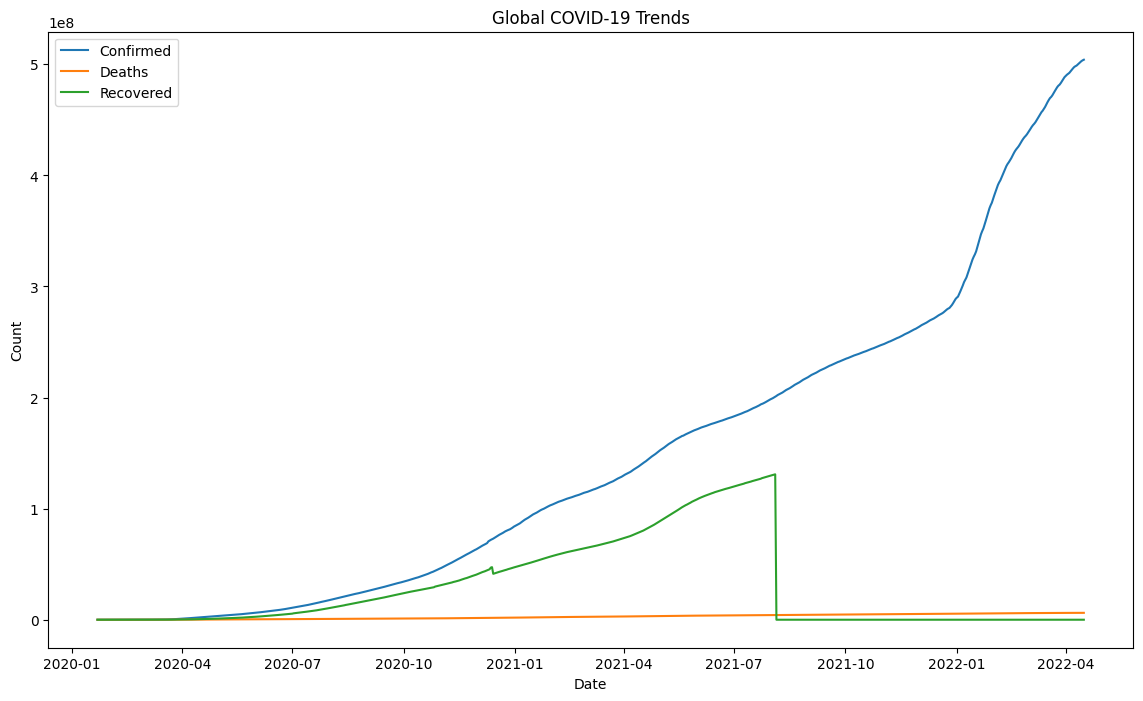

In [85]:
plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Confirmed'], label='Confirmed')
plt.plot(global_data['Date'], global_data['Deaths'], label='Deaths')
plt.plot(global_data['Date'], global_data['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends')
plt.legend()
plt.show()

**4. Country-Specific Analysis**

In [86]:
def plot_country_trends(country):
    country_data = data[data['Country'] == country]

    plt.figure(figsize=(14, 8))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed')
    plt.plot(country_data['Date'], country_data['Deaths'], label='Deaths')
    plt.plot(country_data['Date'], country_data['Recovered'], label='Recovered')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()


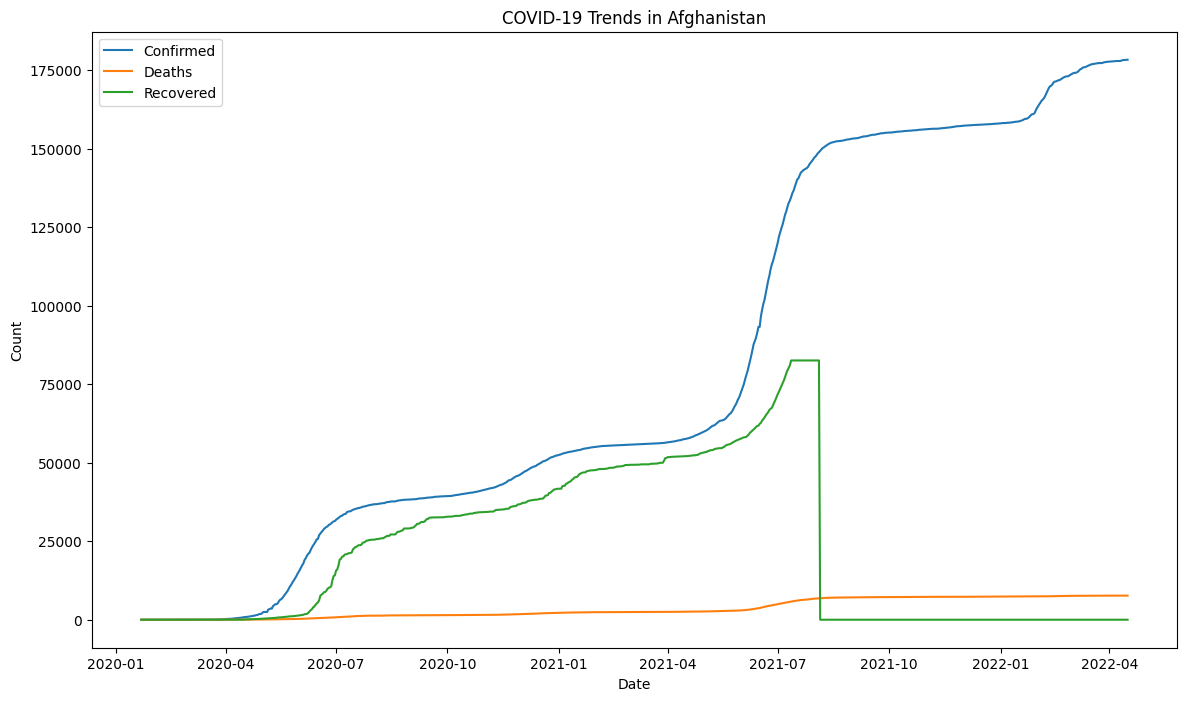

In [87]:
plot_country_trends('Afghanistan')

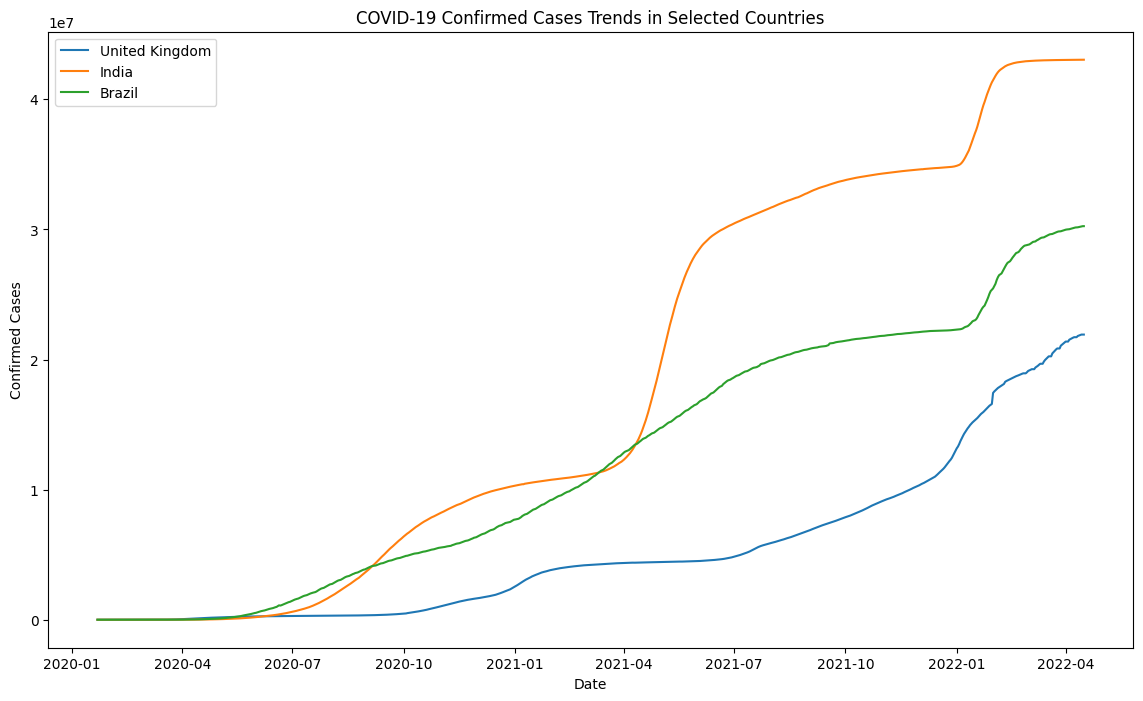

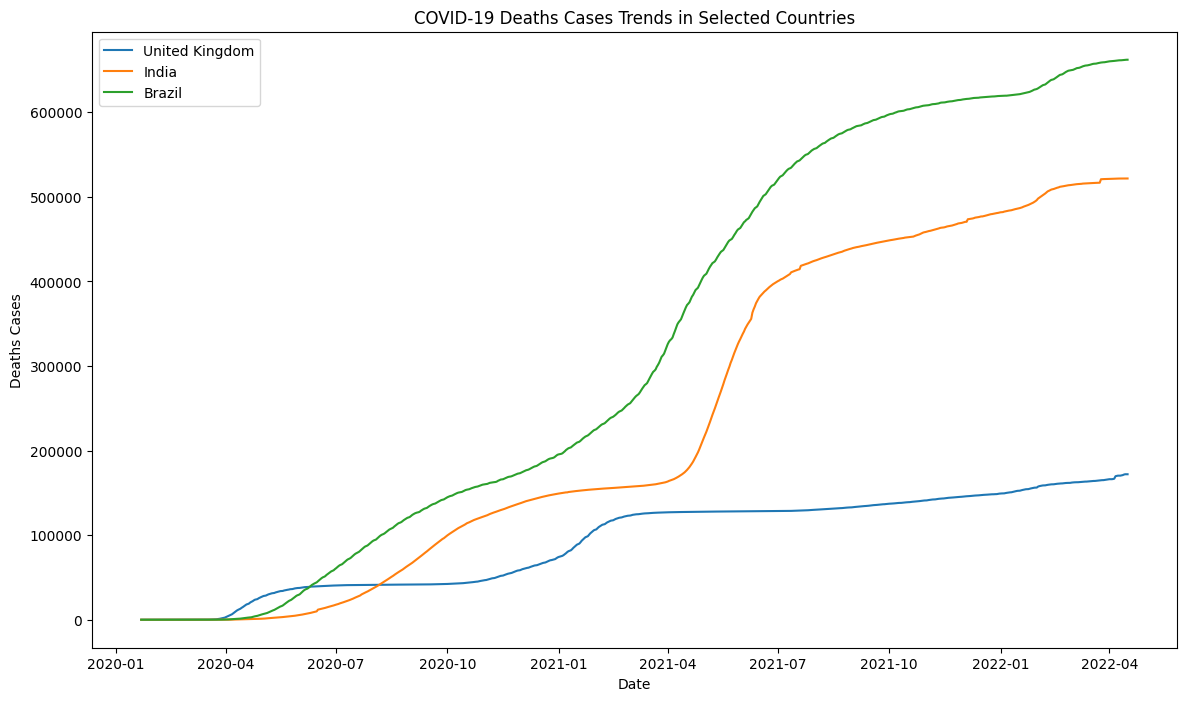

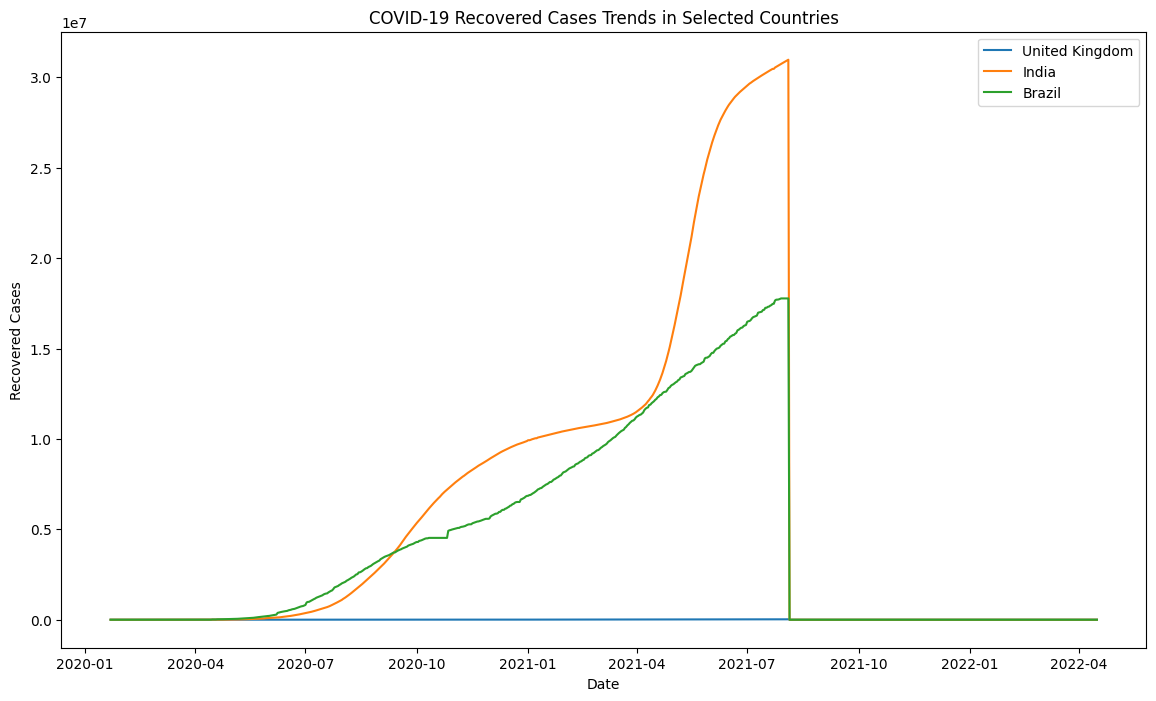

In [88]:

import matplotlib.pyplot as plt

def compare_trends(countries, metric='Confirmed'):
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = data[data['Country'] == country]
        plt.plot(country_data['Date'], country_data[metric], label=country)
    plt.xlabel('Date')
    plt.ylabel(f'{metric} Cases')
    plt.title(f'COVID-19 {metric} Cases Trends in Selected Countries')
    plt.legend()
    plt.show()

compare_trends(['United Kingdom', 'India', 'Brazil'], metric='Confirmed')

compare_trends(['United Kingdom', 'India', 'Brazil'], metric='Deaths')

compare_trends(['United Kingdom', 'India', 'Brazil'], metric='Recovered')


**5. Comparative Analysis**

In [89]:
def plot_moving_average(country, window=7):
    country_data = data[data['Country'] == country].set_index('Date')
    country_data['Confirmed_MA'] = country_data['Confirmed'].rolling(window=window).mean()
    country_data['Deaths_MA'] = country_data['Deaths'].rolling(window=window).mean()

    plt.figure(figsize=(14, 8))
    plt.plot(country_data.index, country_data['Confirmed_MA'], label='Confirmed Moving Average')
    plt.plot(country_data.index, country_data['Deaths_MA'], label='Deaths Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'Moving Average of COVID-19 Trends in {country}')
    plt.legend()
    plt.show()


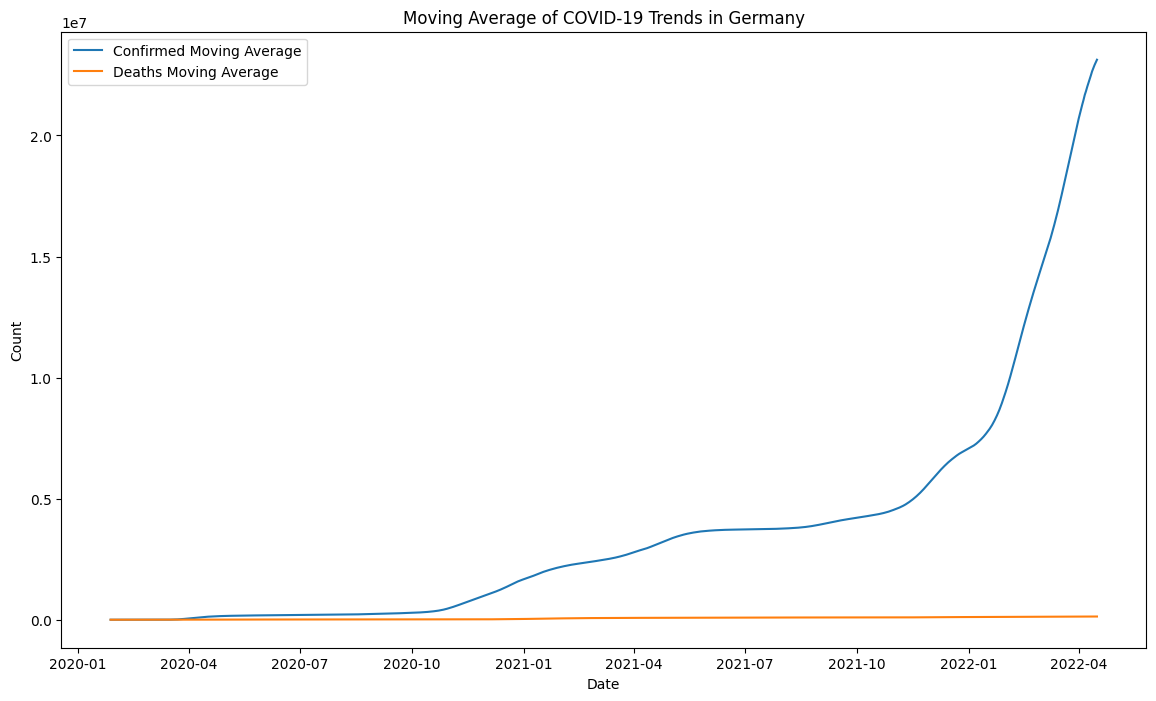

In [90]:
plot_moving_average('Germany')

<ipython-input-91-28d9084fb73c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Confirmed', data=top_10_summary, palette='viridis')


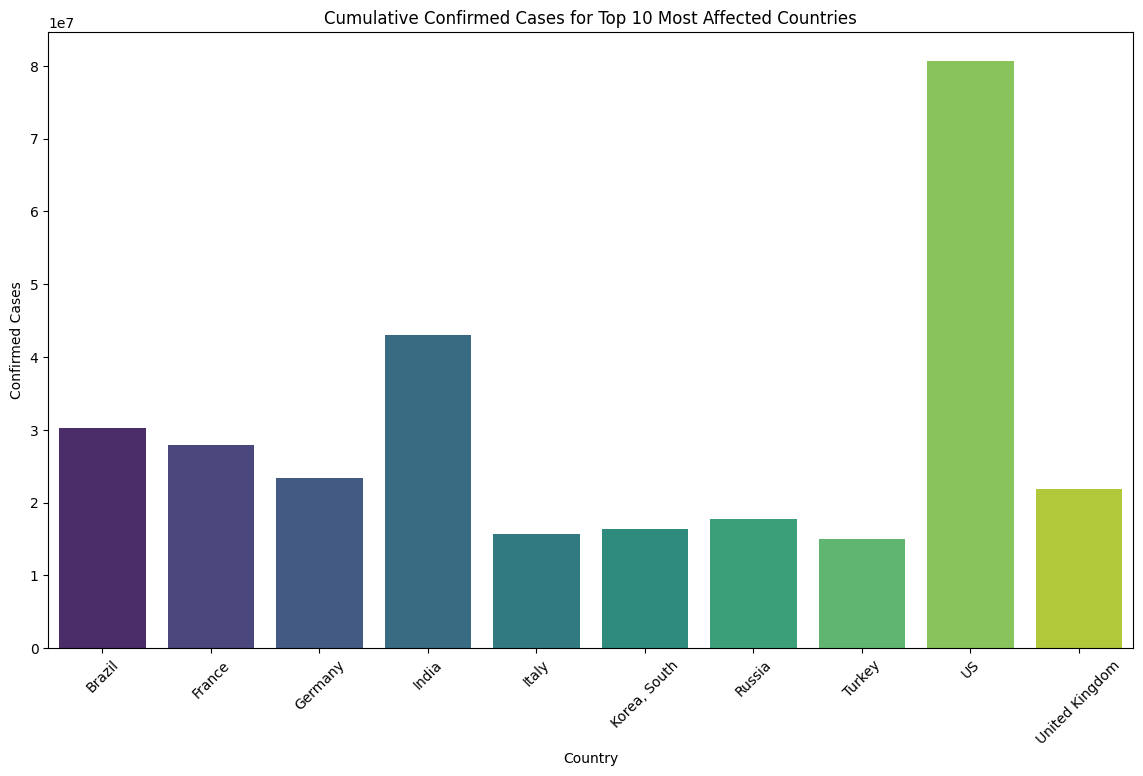

<ipython-input-91-28d9084fb73c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Deaths', data=top_10_summary, palette='viridis')


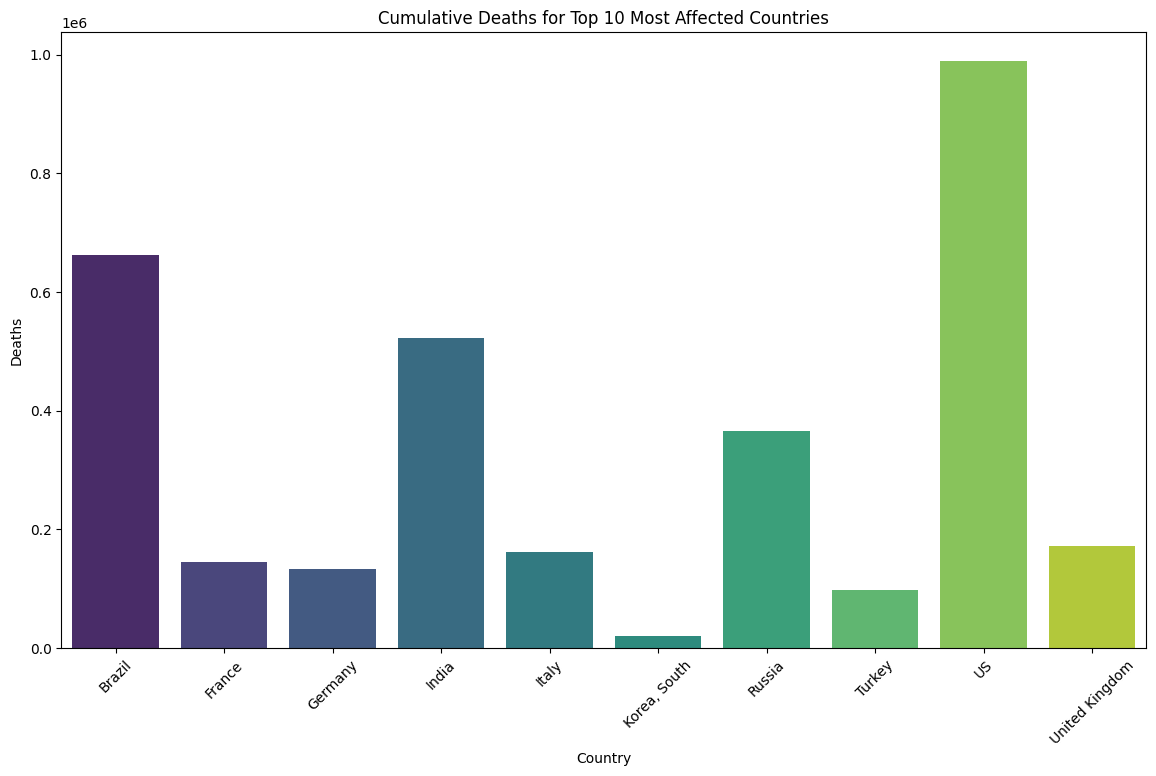

<ipython-input-91-28d9084fb73c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Recovered', data=top_10_summary, palette='viridis')


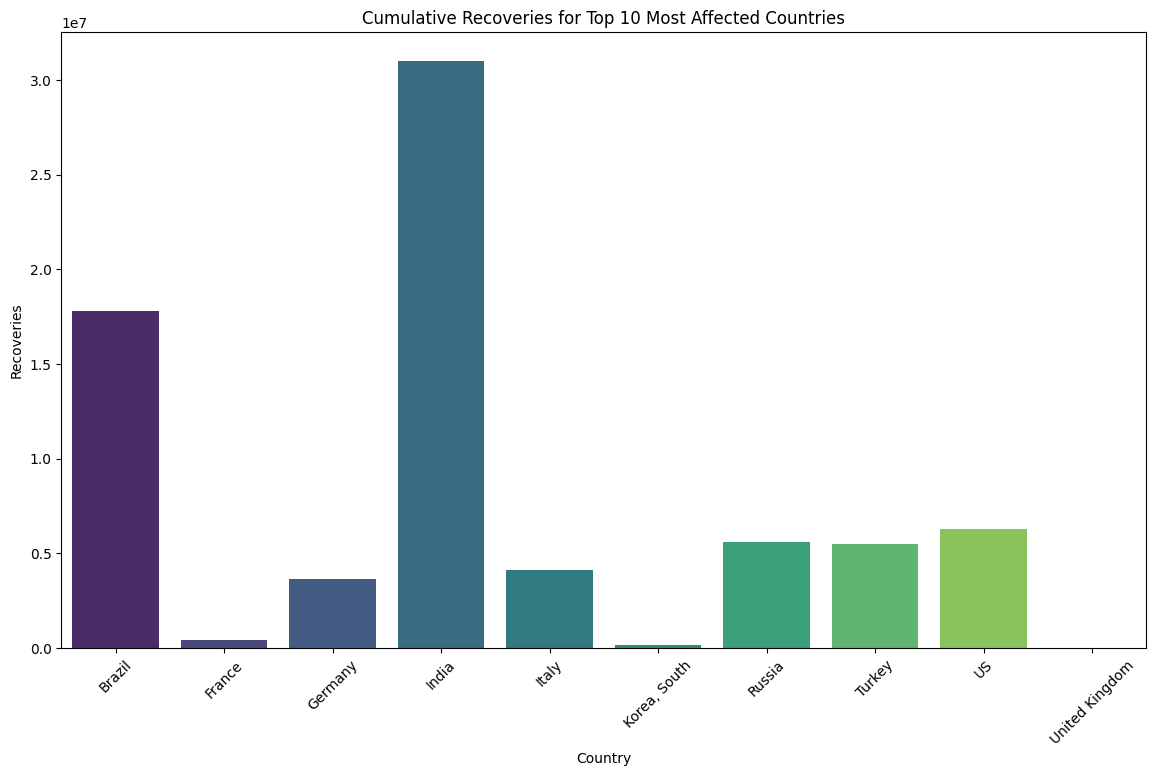

In [91]:

latest_date = data['Date'].max()
latest_data = data[data['Date'] == latest_date]
top_10_countries = latest_data.nlargest(10, 'Confirmed')['Country']


top_10_data = data[data['Country'].isin(top_10_countries)]


top_10_summary = top_10_data.groupby('Country').max().reset_index()


plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Confirmed', data=top_10_summary, palette='viridis')
plt.title('Cumulative Confirmed Cases for Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Deaths', data=top_10_summary, palette='viridis')
plt.title('Cumulative Deaths for Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Recovered', data=top_10_summary, palette='viridis')
plt.title('Cumulative Recoveries for Top 10 Most Affected Countries')
plt.xlabel('Country')
plt.ylabel('Recoveries')
plt.xticks(rotation=45)
plt.show()

**6. Correlation Analysis**

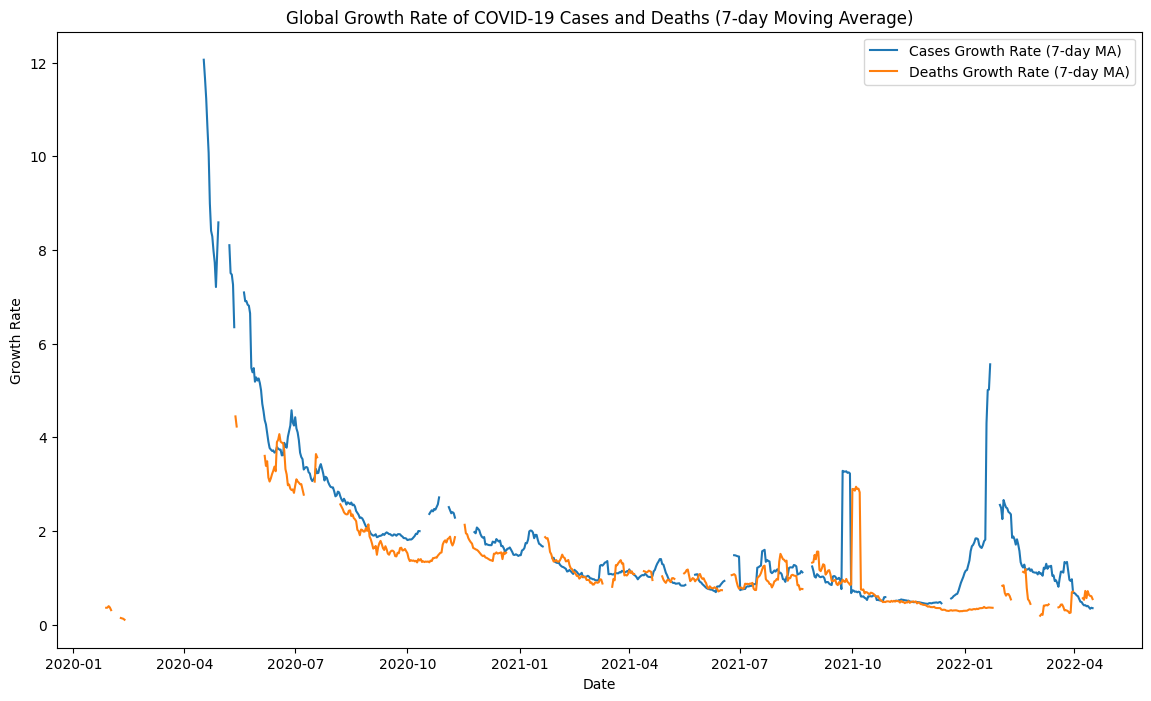

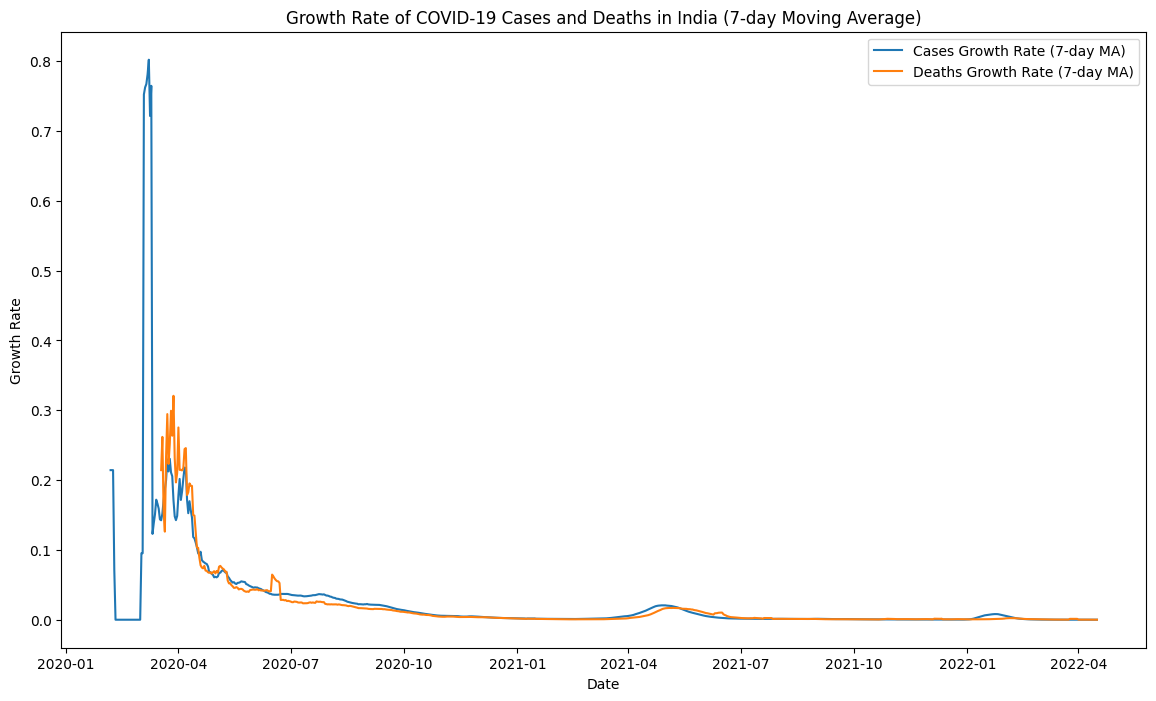

In [92]:
import pandas as pd
import matplotlib.pyplot as plt


def calculate_daily_changes(df):
    df['New_Cases'] = df.groupby('Country')['Confirmed'].diff().fillna(0)
    df['New_Deaths'] = df.groupby('Country')['Deaths'].diff().fillna(0)
    return df


def calculate_growth_rates(df):
    df['Growth_Rate_Cases'] = df['New_Cases'] / df.groupby('Country')['Confirmed'].shift(1).fillna(1)
    df['Growth_Rate_Deaths'] = df['New_Deaths'] / df.groupby('Country')['Deaths'].shift(1).fillna(1)
    return df


def moving_average(series, window):
    return series.rolling(window=window).mean()


def apply_moving_averages(df, window=7):
    df['Growth_Rate_Cases_MA'] = df.groupby('Country')['Growth_Rate_Cases'].transform(lambda x: moving_average(x, window))
    df['Growth_Rate_Deaths_MA'] = df.groupby('Country')['Growth_Rate_Deaths'].transform(lambda x: moving_average(x, window))
    return df




data = calculate_daily_changes(data)
data = calculate_growth_rates(data)


data = apply_moving_averages(data)

global_data = data.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], moving_average(global_data['Growth_Rate_Cases'], window=7), label='Cases Growth Rate (7-day MA)')
plt.plot(global_data['Date'], moving_average(global_data['Growth_Rate_Deaths'], window=7), label='Deaths Growth Rate (7-day MA)')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.title('Global Growth Rate of COVID-19 Cases and Deaths (7-day Moving Average)')
plt.legend()
plt.show()

def plot_country_growth_rate(country):
    country_data = data[data['Country'] == country]
    plt.figure(figsize=(14, 8))
    plt.plot(country_data['Date'], country_data['Growth_Rate_Cases_MA'], label='Cases Growth Rate (7-day MA)')
    plt.plot(country_data['Date'], country_data['Growth_Rate_Deaths_MA'], label='Deaths Growth Rate (7-day MA)')
    plt.xlabel('Date')
    plt.ylabel('Growth Rate')
    plt.title(f'Growth Rate of COVID-19 Cases and Deaths in {country} (7-day Moving Average)')
    plt.legend()
    plt.show()


plot_country_growth_rate('India')


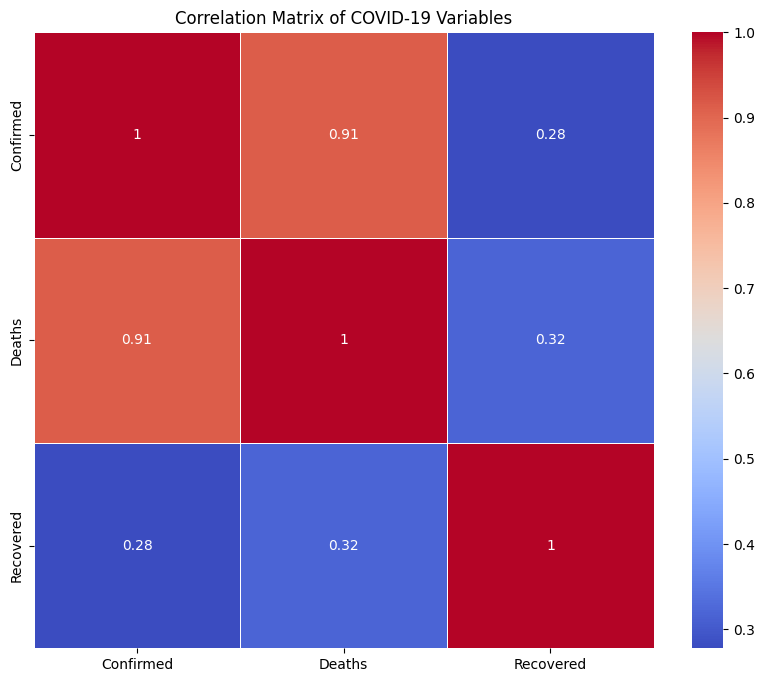

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_data = data[['Confirmed', 'Deaths', 'Recovered']]


correlation_matrix = correlation_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Variables')
plt.show()


# **Covid-19 Data Analysis, Part-2**


**1. What is the trend of confirmed cases, deaths, and recoveries globally over time? Draw plots separately.**



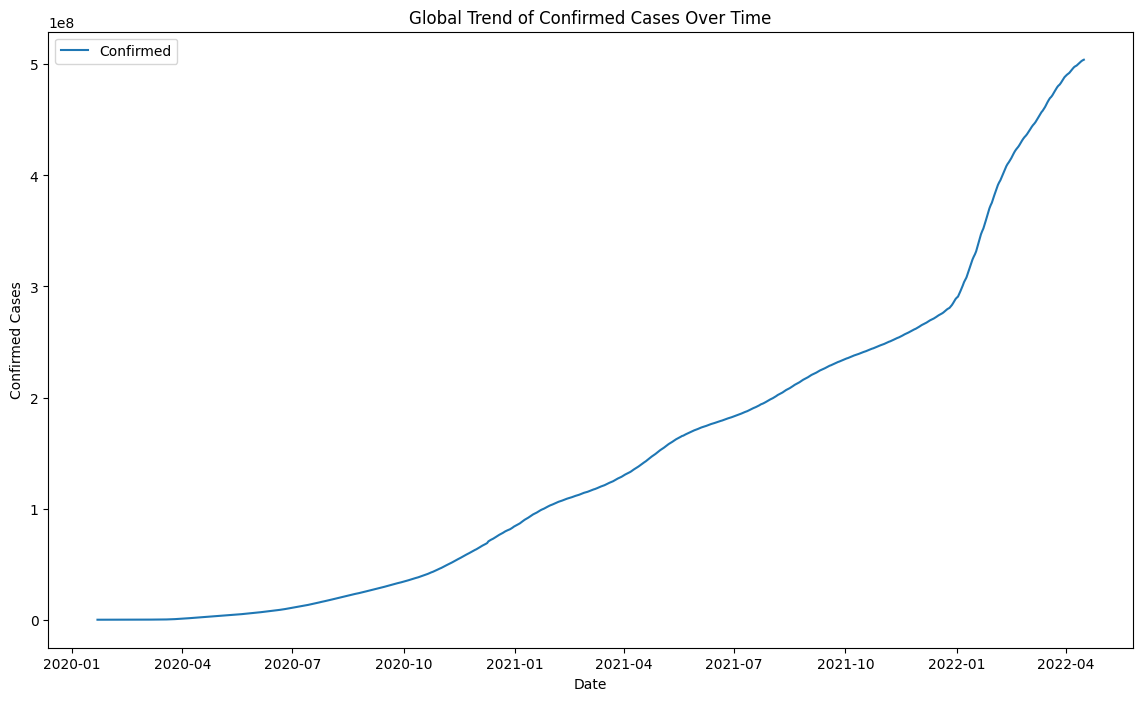

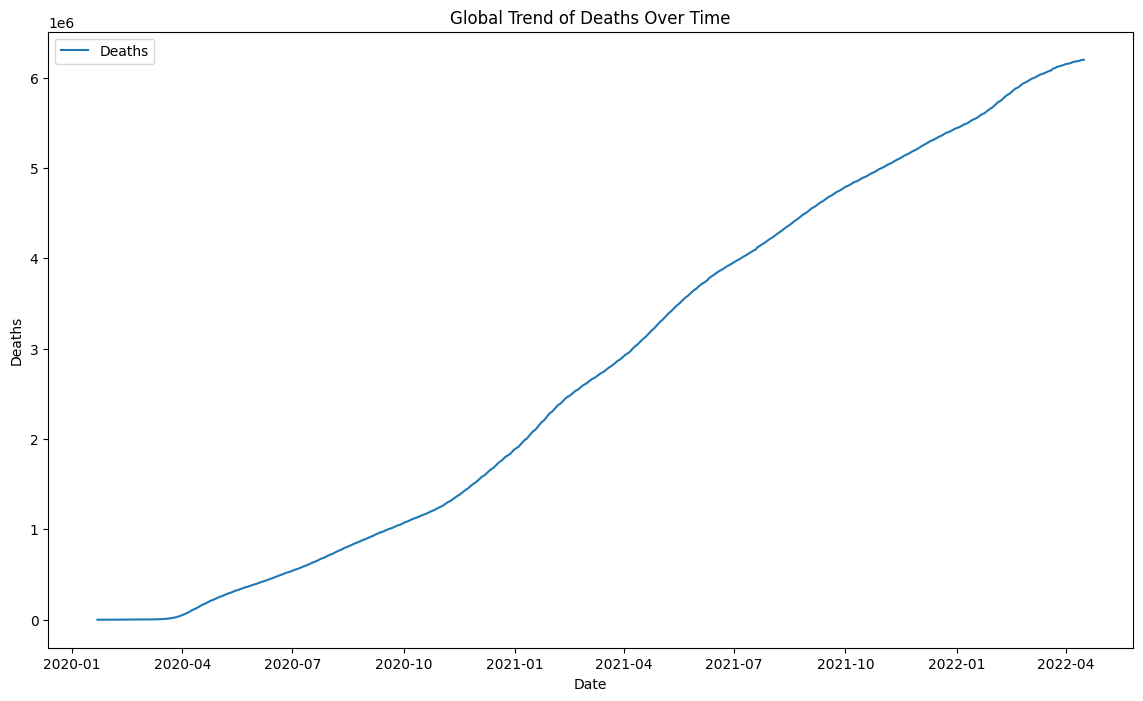

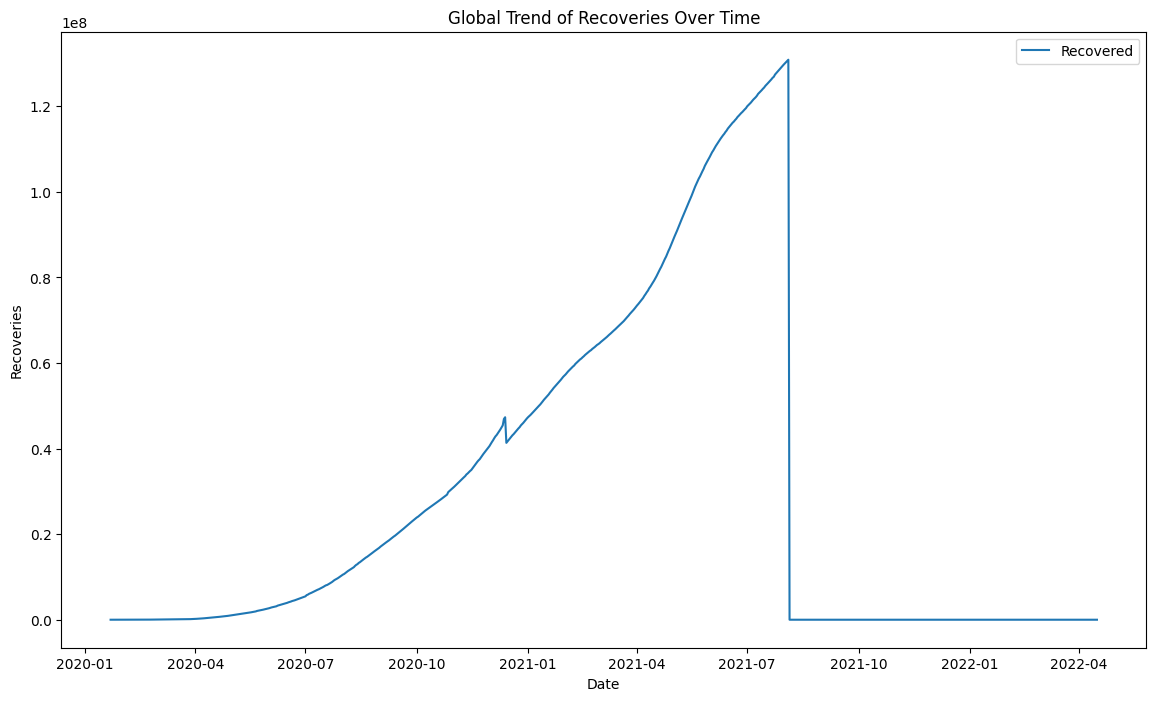

In [94]:

plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Confirmed'], label='Confirmed')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global Trend of Confirmed Cases Over Time')
plt.legend()
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Global Trend of Deaths Over Time')
plt.legend()
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Recovered'], label='Recovered')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.title('Global Trend of Recoveries Over Time')
plt.legend()
plt.show()


  **2.Which country has the highest number of confirmed cases, deaths, and recoveries as of the latest date in the dataset?**


In [95]:

latest_date = data['Date'].max()


latest_data = data[data['Date'] == latest_date]

print(latest_data.sort_values(by='Recovered', ascending=False).head(20))

country_highest_confirmed = latest_data.loc[latest_data['Confirmed'].idxmax()]
country_highest_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
country_highest_recoveries = latest_data.loc[latest_data['Recovered'].idxmax()]

print("Country with the highest number of confirmed cases:")
print(country_highest_confirmed['Country'], "-", country_highest_confirmed['Confirmed'])

print("\nCountry with the highest number of deaths:")
print(country_highest_deaths['Country'], "-", country_highest_deaths['Deaths'])



             Date           Country  Confirmed  Recovered  Deaths  New_Cases  \
815    2022-04-16       Afghanistan     178387          0    7676       14.0   
101999 2022-04-16           Namibia     158074          0    4022       73.0   
103631 2022-04-16       Netherlands    8194946          0   22780      346.0   
104447 2022-04-16       New Zealand     828808          0     554     6138.0   
105263 2022-04-16         Nicaragua      18491          0     232        0.0   
106079 2022-04-16             Niger       8871          0     308        5.0   
106895 2022-04-16           Nigeria     255648          0    3143        2.0   
107711 2022-04-16   North Macedonia     308516          0    9261      126.0   
108527 2022-04-16            Norway    1419507          0    2783      411.0   
109343 2022-04-16              Oman     388795          0    4257        0.0   
110159 2022-04-16          Pakistan    1527248          0   30363       97.0   
110975 2022-04-16             Palau     

**3.How do the trends of confirmed cases differ between the top 5 most affected
countries?**


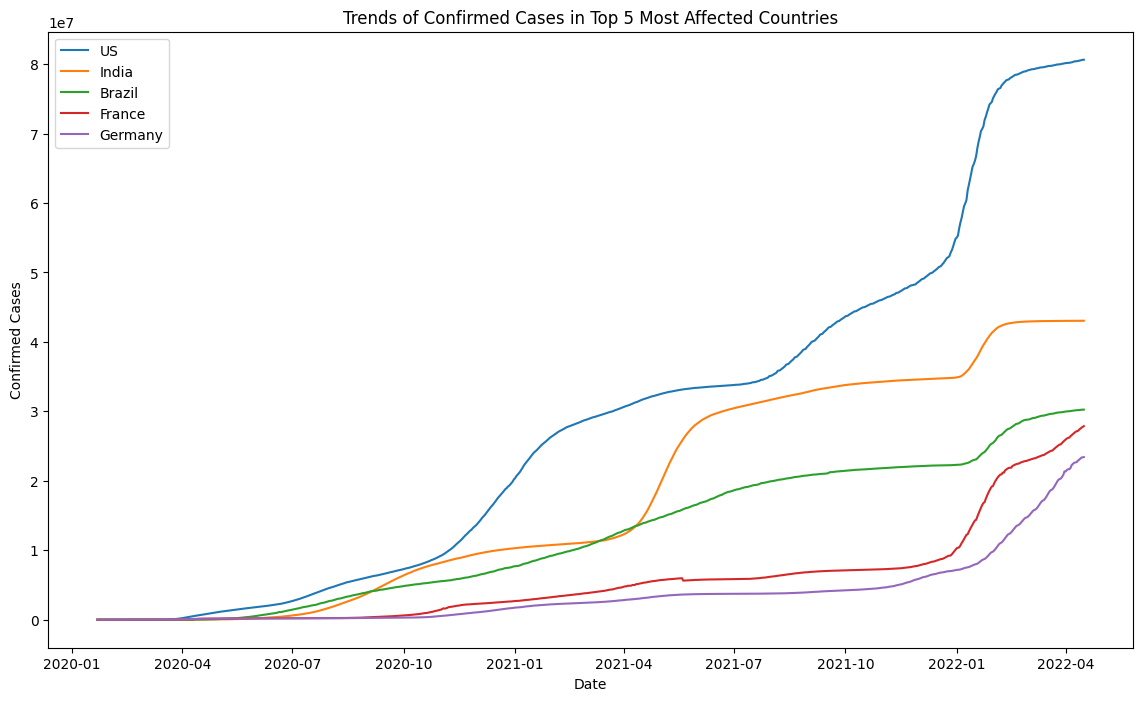

In [96]:

top_5_countries = latest_data.nlargest(5, 'Confirmed')['Country']

plt.figure(figsize=(14, 8))
for country in top_5_countries:
    country_data = data[data['Country'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Trends of Confirmed Cases in Top 5 Most Affected Countries')
plt.legend()
plt.show()


**4.What is the growth rate of confirmed cases, deaths, and recoveries globally?**


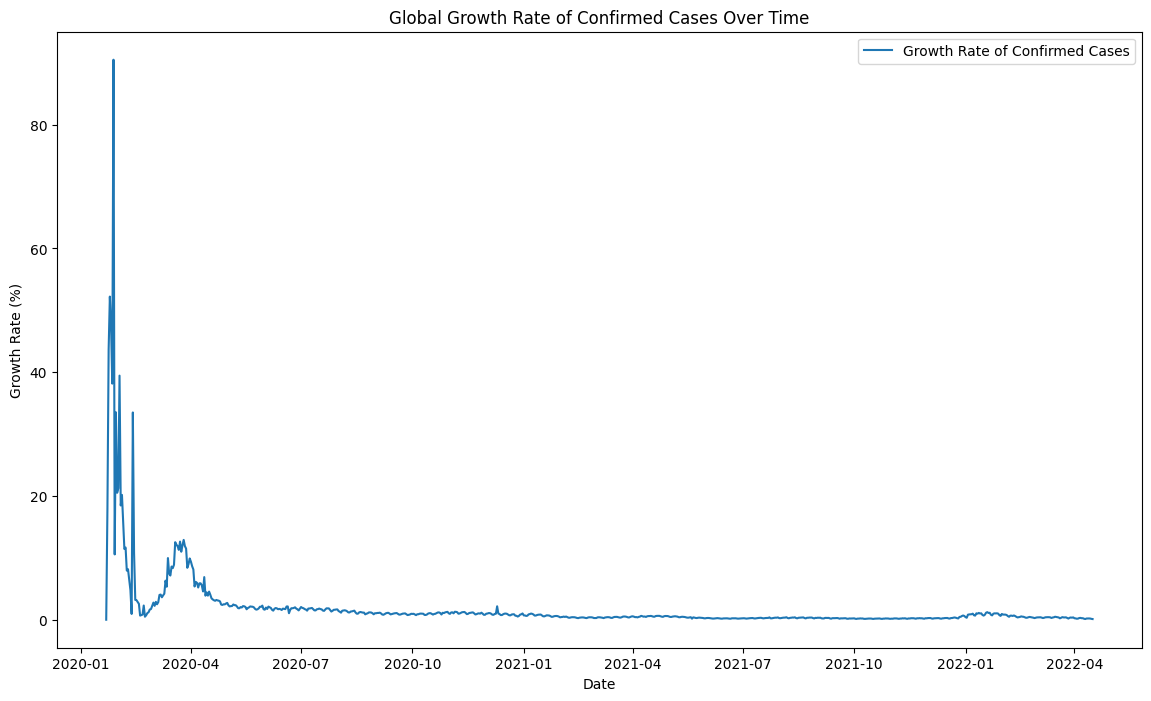

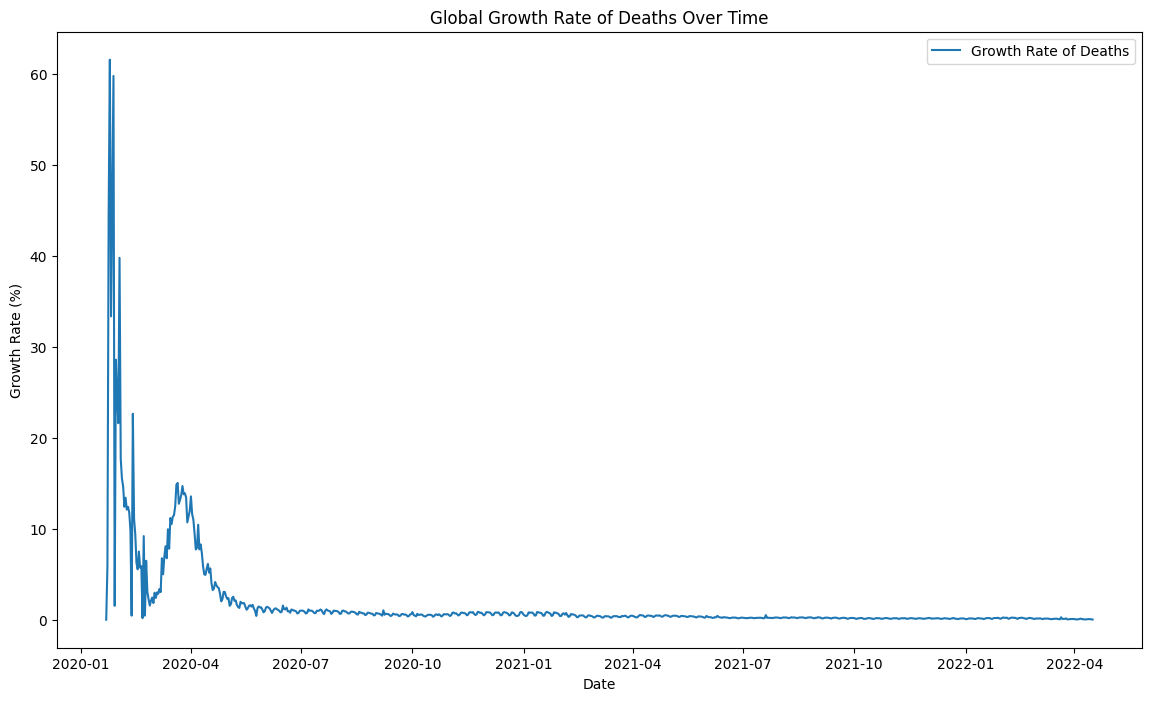

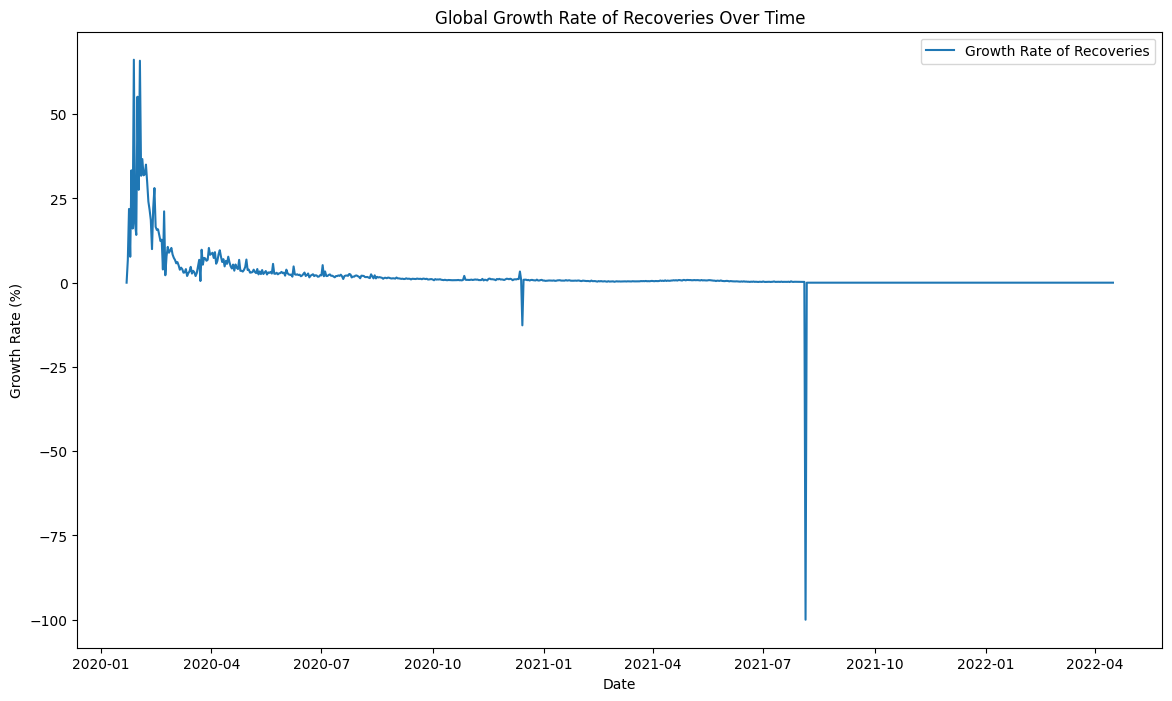

In [97]:

global_data['New_Confirmed'] = global_data['Confirmed'].diff().fillna(0)
global_data['New_Deaths'] = global_data['Deaths'].diff().fillna(0)
global_data['New_Recovered'] = global_data['Recovered'].diff().fillna(0)


global_data['Growth_Rate_Confirmed'] = (global_data['New_Confirmed'] / global_data['Confirmed'].shift(1)).fillna(0) * 100
global_data['Growth_Rate_Deaths'] = (global_data['New_Deaths'] / global_data['Deaths'].shift(1)).fillna(0) * 100
global_data['Growth_Rate_Recovered'] = (global_data['New_Recovered'] / global_data['Recovered'].shift(1)).fillna(0) * 100


plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Growth_Rate_Confirmed'], label='Growth Rate of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Global Growth Rate of Confirmed Cases Over Time')
plt.legend()
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Growth_Rate_Deaths'], label='Growth Rate of Deaths')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Global Growth Rate of Deaths Over Time')
plt.legend()
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(global_data['Date'], global_data['Growth_Rate_Recovered'], label='Growth Rate of Recoveries')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.title('Global Growth Rate of Recoveries Over Time')
plt.legend()
plt.show()


**5.What are the cumulative confirmed cases, deaths, and recoveries for the top 10 most
affected countries?**

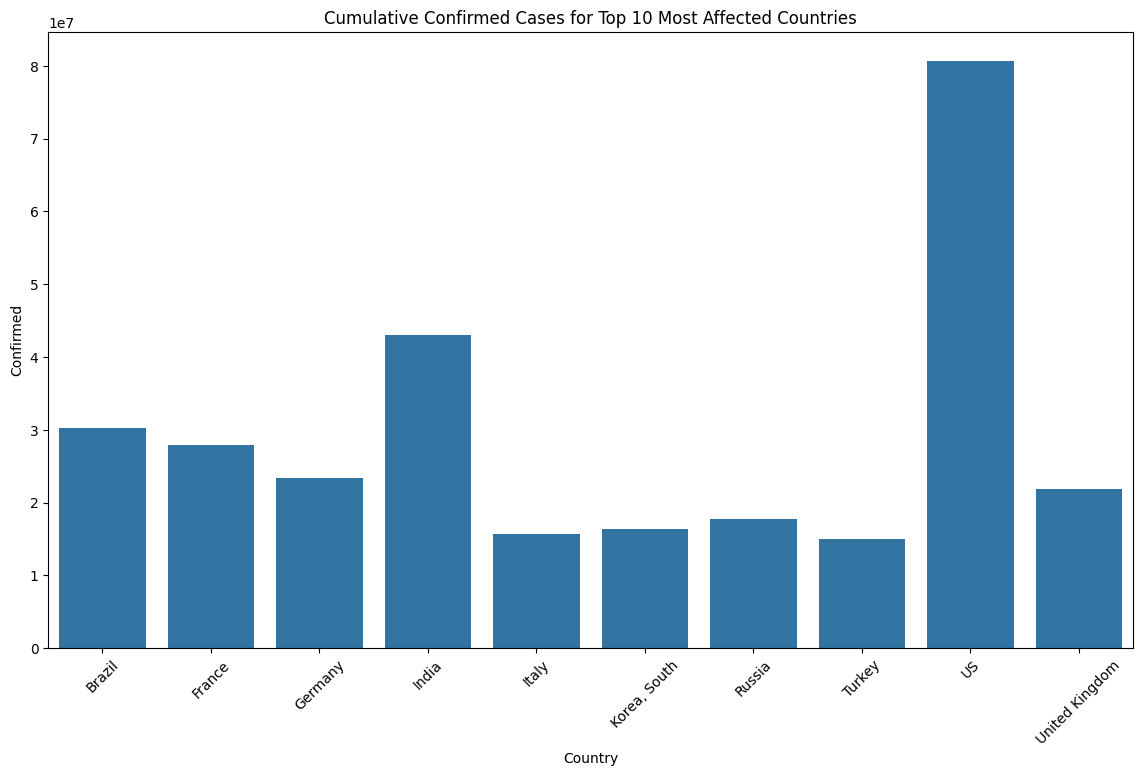

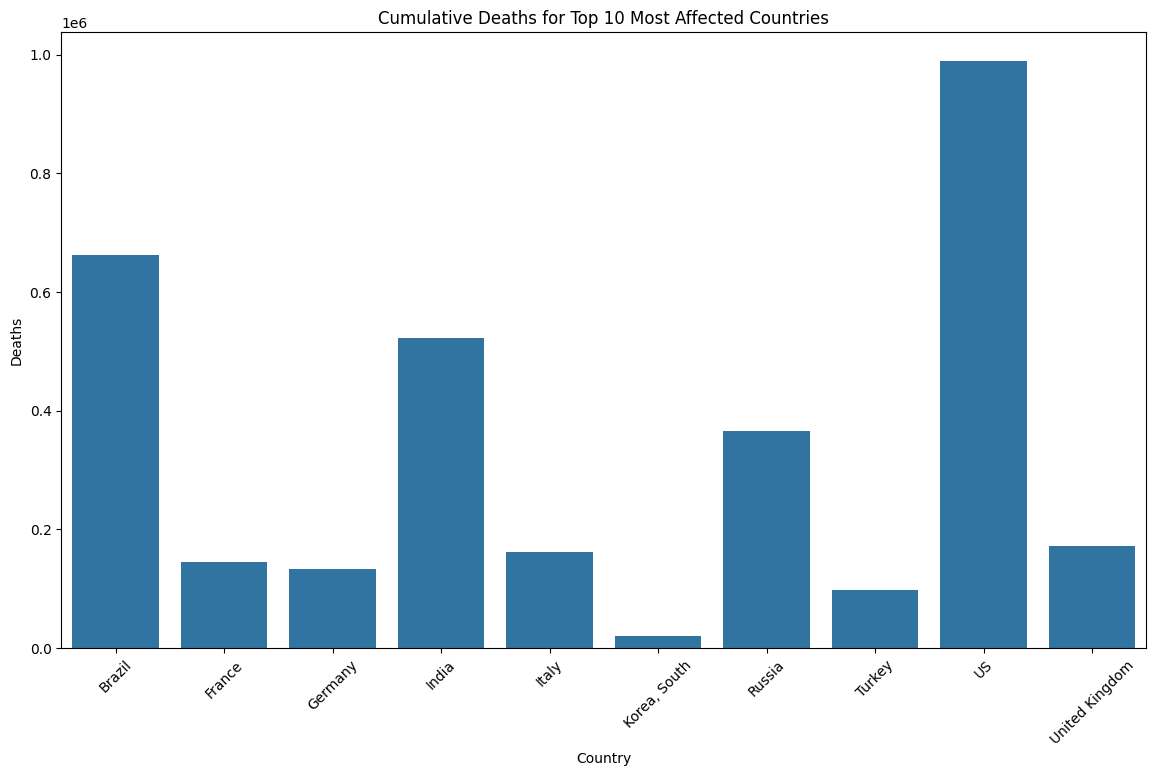

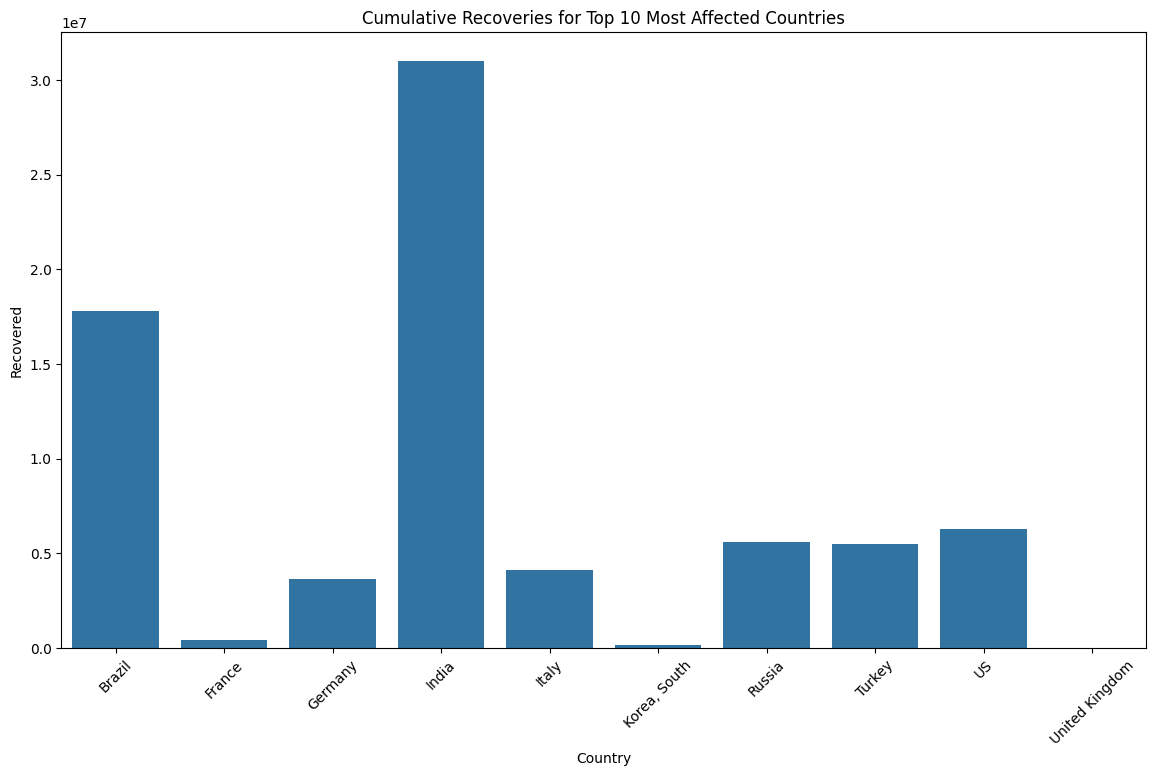

In [98]:

top_10_countries = latest_data.nlargest(10, 'Confirmed')['Country']


top_10_data = data[data['Country'].isin(top_10_countries)]


plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Confirmed', data=top_10_data.groupby('Country').max().reset_index())
plt.title('Cumulative Confirmed Cases for Top 10 Most Affected Countries')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Deaths', data=top_10_data.groupby('Country').max().reset_index())
plt.title('Cumulative Deaths for Top 10 Most Affected Countries')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Recovered', data=top_10_data.groupby('Country').max().reset_index())
plt.title('Cumulative Recoveries for Top 10 Most Affected Countries')
plt.xticks(rotation=45)
plt.show()


**6.How does the recovery rate compare across different countries?**


In [99]:
recovery_rates = data.groupby('Country').agg({
    'Confirmed': 'max',
    'Recovered': 'max'
})

recovery_rates['RecoveryRate'] = (recovery_rates['Recovered'] / recovery_rates['Confirmed']) * 100

<ipython-input-100-4f9b508de120>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RecoveryRate', y='Country', data=recovery_rates.head(10), palette='cubehelix')


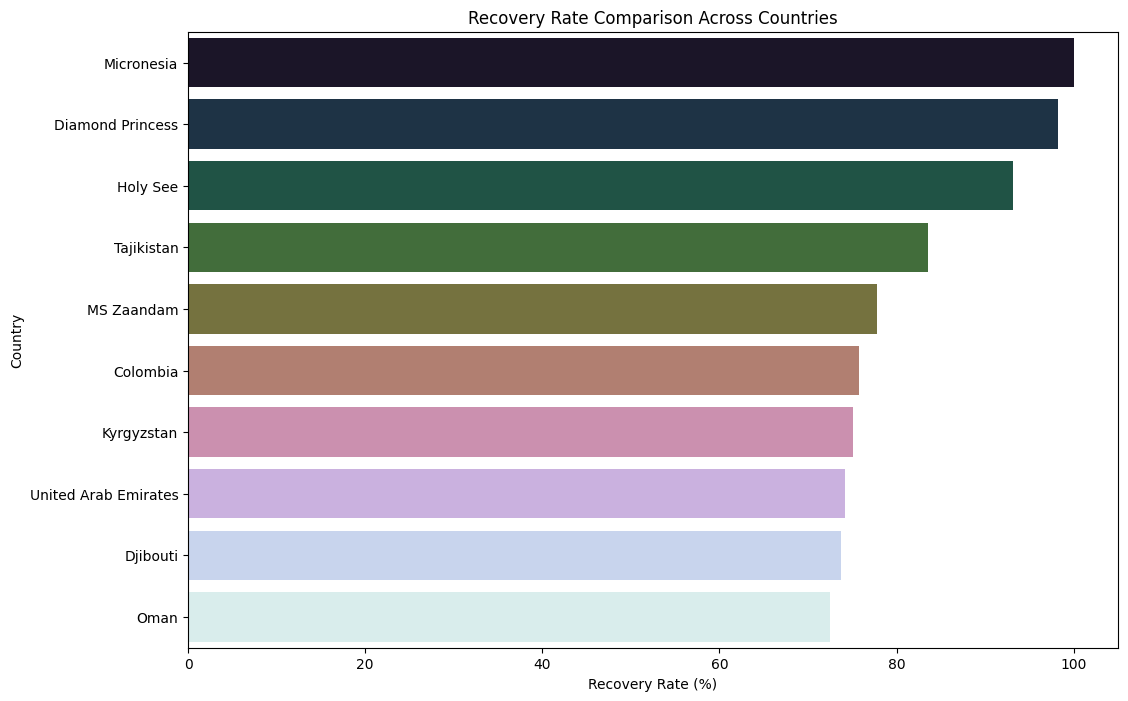

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

recovery_rates = recovery_rates.sort_values(by='RecoveryRate', ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='RecoveryRate', y='Country', data=recovery_rates.head(10), palette='cubehelix')
plt.title('Recovery Rate Comparison Across Countries')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('Country')
plt.show()

**7.What is the correlation between confirmed cases, deaths, and recoveries globally?**


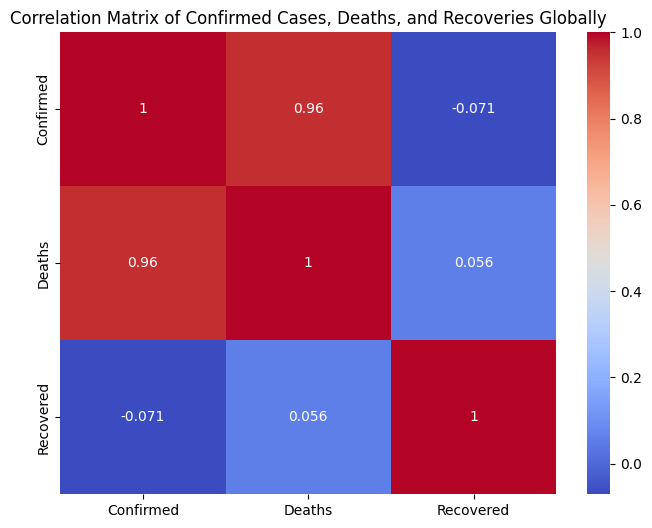

In [101]:

correlation_matrix = global_data[['Confirmed', 'Deaths', 'Recovered']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Confirmed Cases, Deaths, and Recoveries Globally')
plt.show()


**8.How do lockdown measures impact the trend of confirmed cases in different
countries?**

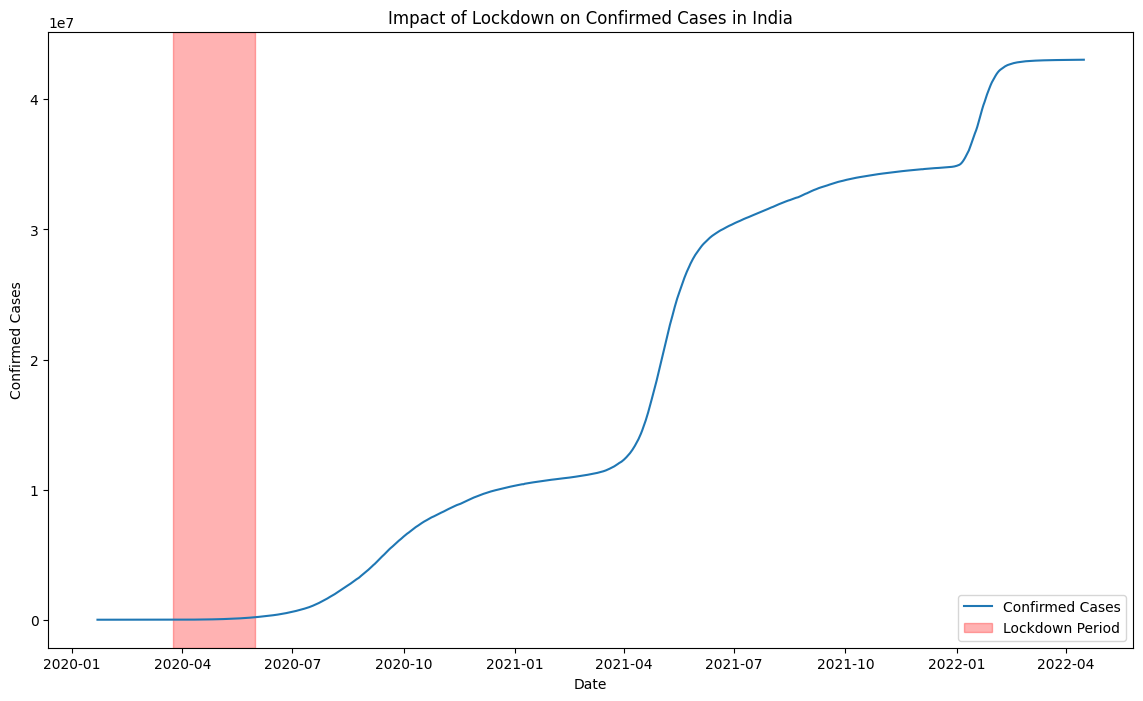

In [102]:

lockdown_data = pd.DataFrame({
    'Country': ['United States', 'India', 'Brazil', 'Russia', 'France'],
    'Start_Date': ['2020-03-20', '2020-03-24', '2020-03-26', '2020-03-30', '2020-03-17'],
    'End_Date': ['2020-06-01', '2020-05-31', '2020-05-11', '2020-05-12', '2020-05-11']
})


lockdown_data['Start_Date'] = pd.to_datetime(lockdown_data['Start_Date'])
lockdown_data['End_Date'] = pd.to_datetime(lockdown_data['End_Date'])

def plot_with_lockdown(country):
    country_data = data[data['Country'] == country]
    lockdown_period = lockdown_data[lockdown_data['Country'] == country]

    plt.figure(figsize=(14, 8))
    plt.plot(country_data['Date'], country_data['Confirmed'], label='Confirmed Cases')

    for _, row in lockdown_period.iterrows():
        plt.axvspan(row['Start_Date'], row['End_Date'], color='red', alpha=0.3, label='Lockdown Period')

    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title(f'Impact of Lockdown on Confirmed Cases in {country}')
    plt.legend()
    plt.show()

plot_with_lockdown('India')


**9.How does the number of tests conducted relate to the number of confirmed cases in various countries?**

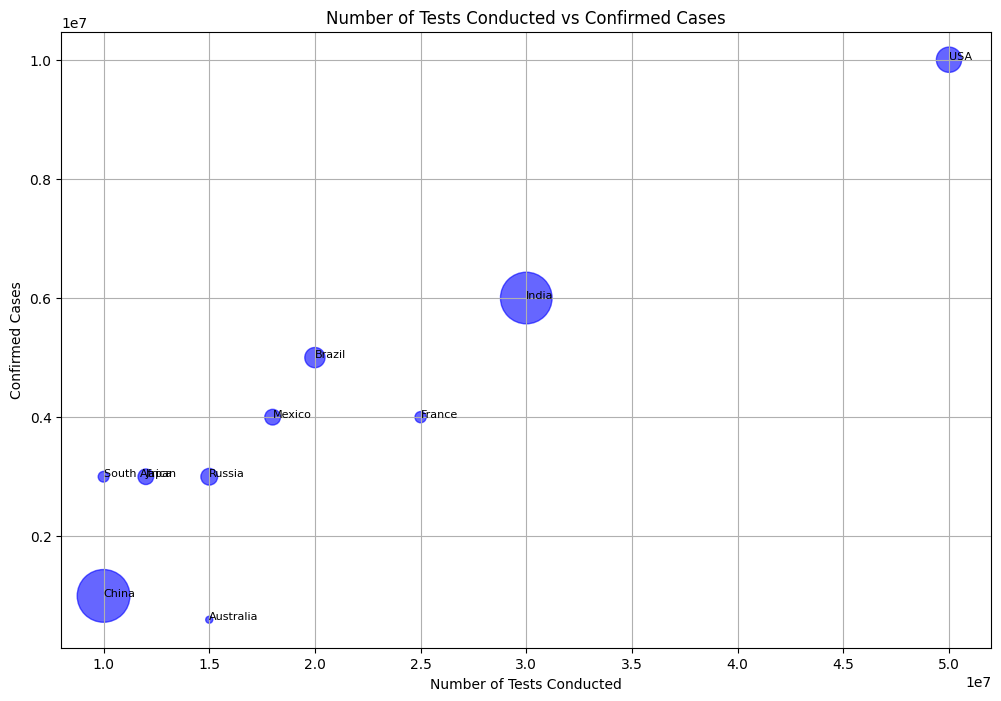

In [111]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Country': ['USA', 'Brazil', 'India', 'Russia', 'China', 'Australia', 'France', 'South Africa', 'Mexico', 'Japan'],
    'Tests Conducted': [50000000, 20000000, 30000000, 15000000, 10000000, 15000000, 25000000, 10000000, 18000000, 12000000],
    'Confirmed Cases': [10000000, 5000000, 6000000, 3000000, 1000000, 600000, 4000000, 3000000, 4000000, 3000000],
    'Population': [331000000, 212000000, 1380000000, 145000000, 1440000000, 25600000, 65200000, 59300000, 128000000, 126000000]
}

df = pd.DataFrame(data)


df['Tests per Million'] = (df['Tests Conducted'] / df['Population']) * 1000000


plt.figure(figsize=(12, 8))
plt.scatter(df['Tests Conducted'], df['Confirmed Cases'], s=df['Population']/1000000, c='blue', alpha=0.6)


plt.title('Number of Tests Conducted vs Confirmed Cases')
plt.xlabel('Number of Tests Conducted')
plt.ylabel('Confirmed Cases')


for i, txt in enumerate(df['Country']):
    plt.annotate(txt, (df.loc[i, 'Tests Conducted'], df.loc[i, 'Confirmed Cases']), fontsize=8)

plt.grid(True)
plt.show()


**10.What is the distribution of confirmed cases, deaths, and recoveries by continent?**

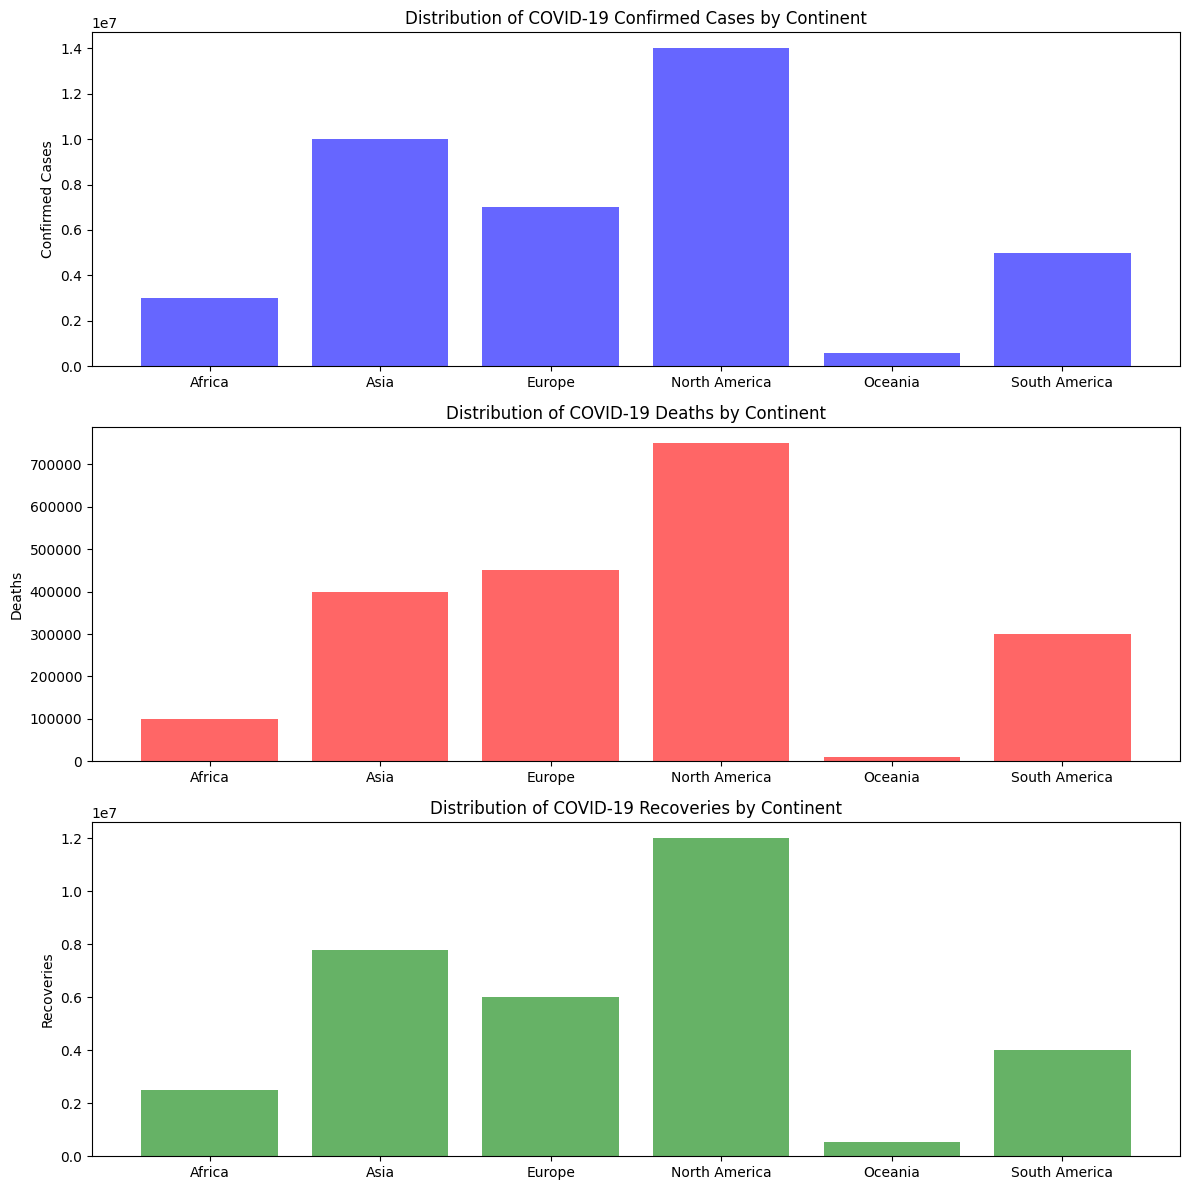

In [112]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Country': ['USA', 'Brazil', 'India', 'Russia', 'China', 'Australia', 'France', 'South Africa', 'Mexico', 'Japan'],
    'Continent': ['North America', 'South America', 'Asia', 'Europe', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'Asia'],
    'Confirmed': [10000000, 5000000, 6000000, 3000000, 1000000, 600000, 4000000, 3000000, 4000000, 3000000],
    'Deaths': [500000, 300000, 200000, 150000, 50000, 10000, 300000, 100000, 250000, 150000],
    'Recovered': [9000000, 4000000, 5000000, 2500000, 800000, 550000, 3500000, 2500000, 3000000, 2000000]
}

df = pd.DataFrame(data)


continent_data = df.groupby('Continent').sum().reset_index()


plt.figure(figsize=(12, 12))


plt.subplot(3, 1, 1)
plt.bar(continent_data['Continent'], continent_data['Confirmed'], color='blue', alpha=0.6)
plt.title('Distribution of COVID-19 Confirmed Cases by Continent')
plt.ylabel('Confirmed Cases')


plt.subplot(3, 1, 2)
plt.bar(continent_data['Continent'], continent_data['Deaths'], color='red', alpha=0.6)
plt.title('Distribution of COVID-19 Deaths by Continent')
plt.ylabel('Deaths')


plt.subplot(3, 1, 3)
plt.bar(continent_data['Continent'], continent_data['Recovered'], color='green', alpha=0.6)
plt.title('Distribution of COVID-19 Recoveries by Continent')
plt.ylabel('Recoveries')

plt.tight_layout()
plt.show()
